In [38]:
!nvidia-smi

Thu Aug  4 11:32:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [39]:
import numpy as np
from scipy.linalg import sqrtm
from scipy.special import softmax

import networkx as nx
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

from IPython.display import HTML

In [21]:
## draw kkl

# def draw_kkl(nx_G, label_map, node_color, pos=None, **kwargs):
#   fig, ax = plt.subplots(figsize=(10, 10))
#   if pos is None:
#     pos = nx.spring_layout(nx_G, k = 5 / np.sqrt(nx_G.number_of_nodes))
  
#   nx.draw(
#       nx_G,
#       pos,
#       with_labels = label_map is not None,
#       labels = label_map,
#       node_color = node_color,
#       ax = ax,
#       **kwargs
#   )

def draw_kkl(nx_G, label_map, node_color, pos=None, **kwargs):
    fig, ax = plt.subplots(figsize=(10,10))
    if pos is None:
        pos = nx.spring_layout(nx_G, k=5/np.sqrt(nx_G.number_of_nodes()))

    nx.draw(
        nx_G, pos, with_labels=label_map is not None, 
        labels=label_map, 
        node_color=node_color, 
        ax=ax, **kwargs)

### Zachary's Karate Club

In [4]:
g = nx.karate_club_graph()

In [6]:
print(g)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [7]:
g.number_of_nodes(), g.number_of_edges()

(34, 78)

In [8]:
communities = greedy_modularity_communities(g)

In [9]:
print(communities)

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]


In [10]:
colors = np.zeros(g.number_of_nodes())

for i, com in enumerate(communities):
  colors[list(com)] = i

n_classes = np.unique(colors).shape[0]

# np.eye : 어느 부분에 대각행렬을 나타낼 것인지 결정하는 부분임.
labels = np.eye(n_classes)[colors.astype(int)]

In [11]:
print(colors)

[2. 1. 1. 1. 2. 2. 2. 1. 0. 1. 2. 2. 1. 1. 0. 0. 2. 1. 0. 2. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
print(np.unique(colors))
print(np.unique(colors).shape)

[0. 1. 2.]
(3,)


In [13]:
print(communities)

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]


In [14]:
print(labels)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [15]:
print(len(labels))

34


In [18]:
club_labels = nx.get_node_attributes(g, 'club')
print(club_labels)

{0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}


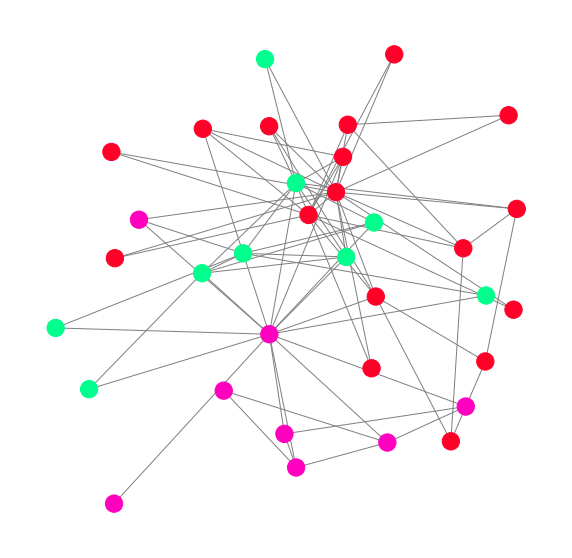

In [22]:
_ = draw_kkl(g, None, colors, cmap='gist_rainbow', edge_color='gray')

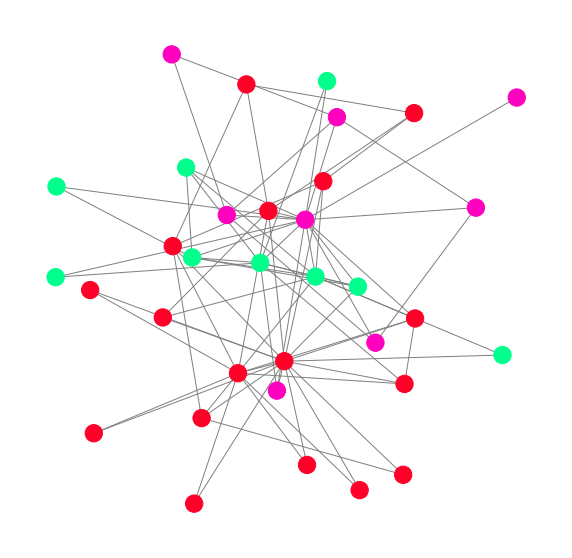

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(g, k = 5/np.sqrt(g.number_of_nodes()))
kwargs = {'cmap' : 'gist_rainbow', 'edge_color' : 'gray'}
nx.draw(
    g, pos, with_labels = False,
    node_color = colors,
    ax = ax,
    **kwargs
)
# plt.savefig('karate_club_graph.png', bbox_inches='tight', transparent=True)

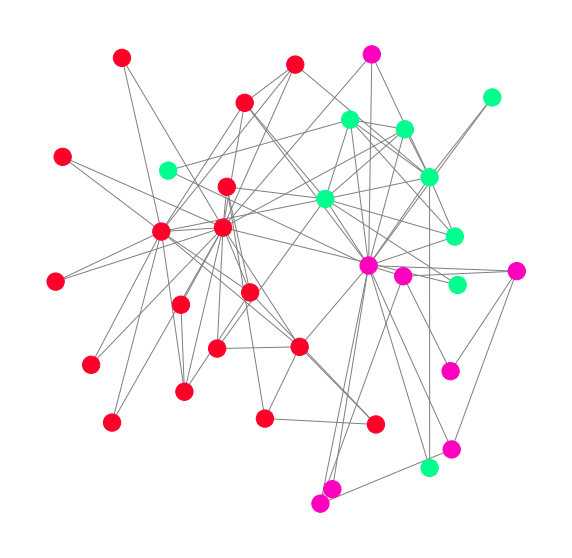

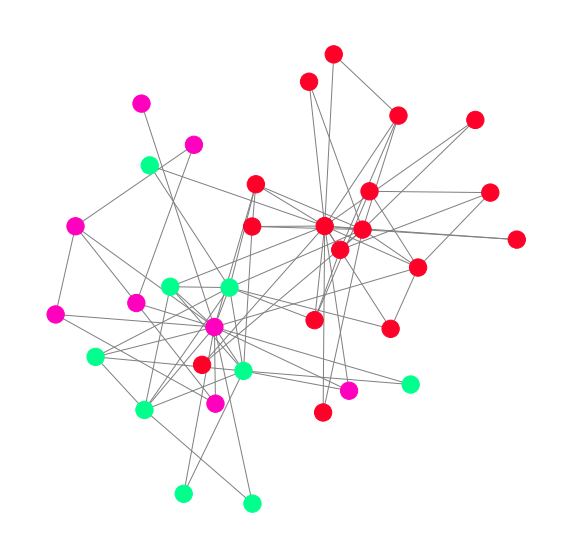

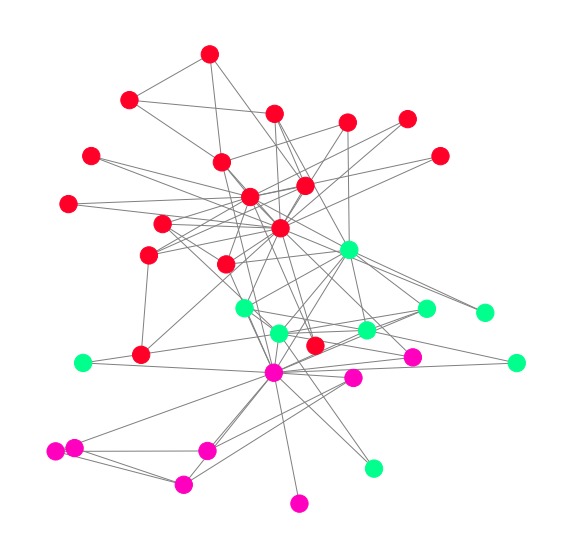

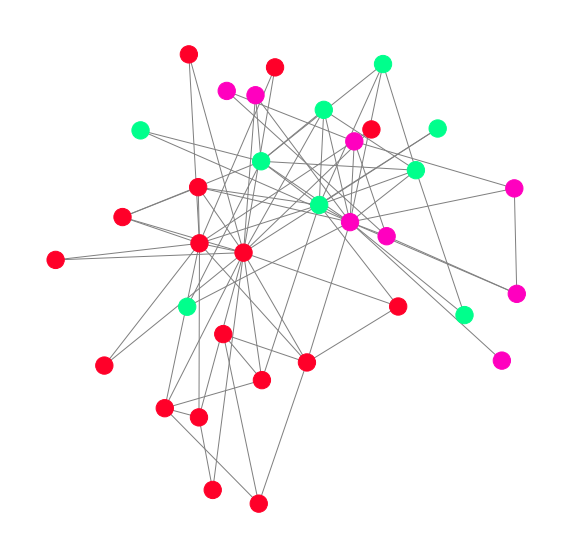

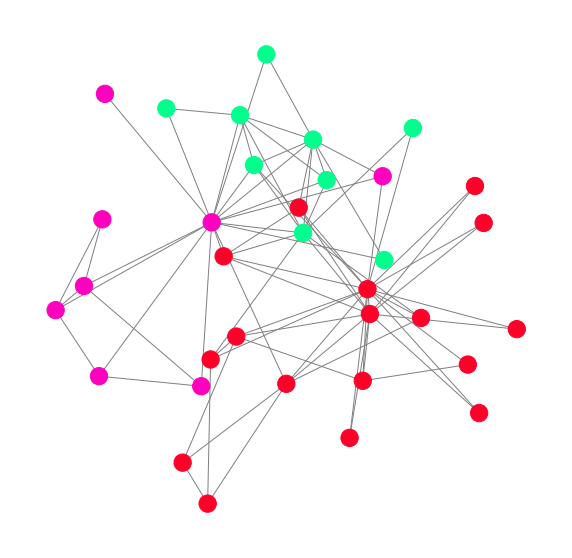

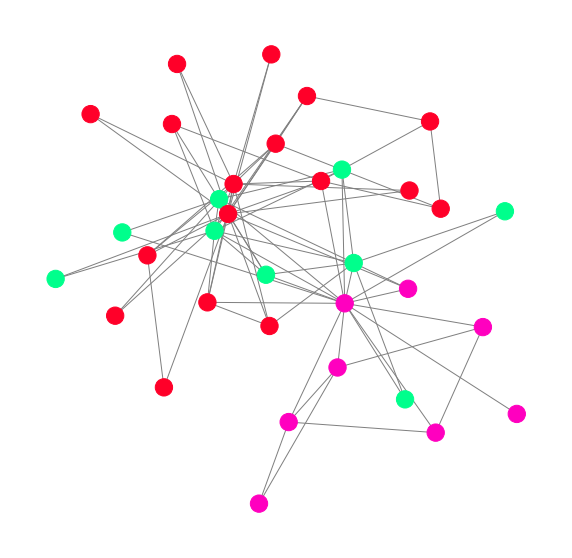

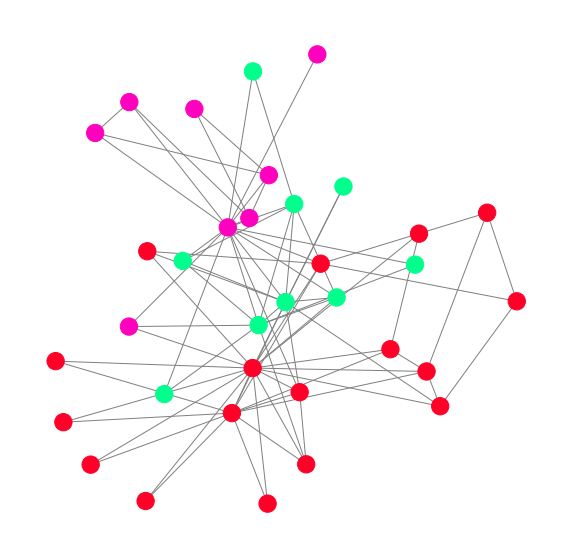

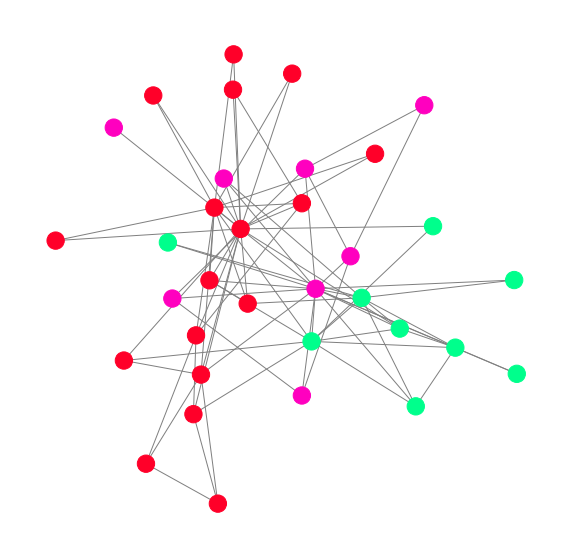

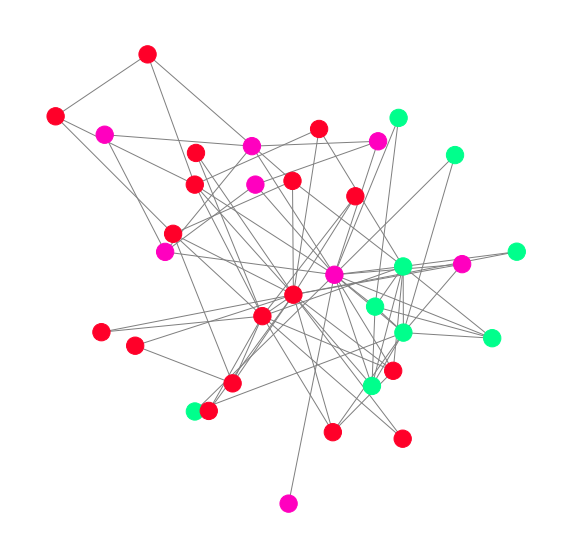

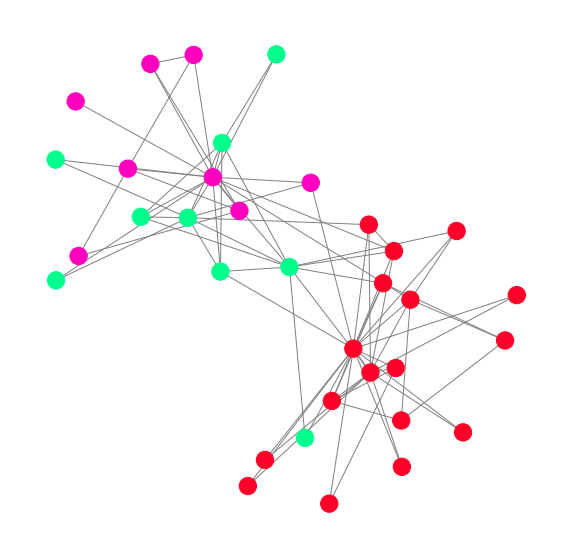

In [26]:
for i in range(10):
  fig, ax = plt.subplots(figsize=(10, 10))
  pos = nx.spring_layout(g, k = 5/np.sqrt(g.number_of_nodes()))
  kwargs = {'cmap' : 'gist_rainbow', 'edge_color' : 'gray'}
  nx.draw(
      g, pos, with_labels = False,
      node_color = colors,
      ax = ax,
      **kwargs
  )
  # plt.savefig('karate_club_graph.png', bbox_inches='tight', transparent=True)

In [27]:
A = nx.to_numpy_matrix(g)
print(A)

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [29]:
# Adjancency Matrix 인접행렬을 의미.
# 총 34개의 Node가 있으므로 34 x 34 형식의 인접행렬이 만들어짐.

print(A.shape)

(34, 34)


In [30]:
# Add self-connections
# Graph에 Self-Connections를 추가하는 것을 말한다.
A_mod = A + np.eye(g.number_of_nodes())

### We want to normalize these connections by the neighborhood sizes.

In [ ]:
D_mod = np.zeros_like(A_mod)

In [31]:
print(A_mod)

[[1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [32]:
print(D_mod)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
### We want to normalize these connections by the neighborhood sizes.
# So we count the number of connections for each node : A_mod.sum(axis=1)
# and put it in the diagonal matrix of another m x n matrix which we call D_mod : D_mod에 np.fill_diagonal을 적용해서 그 Digonal에 각 Node마다의 Connections를 투입한다.

np.fill_diagonal(D_mod, np.asarray(A_mod.sum(axis=1)).flatten())

In [34]:
print(D_mod)

[[17.  0.  0. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 0.  0. 11. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 18.]]


In [35]:
# np.linalg.inv : 역행렬 계산하기.
# https://www.delftstack.com/ko/api/numpy/python-numpy-linalg.inverse/

# sqrtm() 함수
# The sqrtm() function of scipy.linalg package can be used to find the square root of an input matrix.
# https://www.tutorialspoint.com/python-scipy-linalg-sqrtm

# D^~ (- 1 / 2)
# The final equation takes the inverse square root of D_mod 
D_mod_invroot = np.linalg.inv(sqrtm(D_mod))
print(D_mod_invroot)

[[0.24253563 0.         0.         ... 0.         0.         0.        ]
 [0.         0.31622777 0.         ... 0.         0.         0.        ]
 [0.         0.         0.30151134 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.37796447 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2773501  0.        ]
 [0.         0.         0.         ... 0.         0.         0.23570226]]


In [36]:
# Normalized form of Adjacency Matrix
# 인접행렬의 Normalized된 Form을 말함.

# The final equation takes the inverse square root of D_mod 
# and then sandwiches A_mod in between two of them

# This ultimately just scales each one in the adjacency matrix by one over the square root of d_i times d_j
# where d_i and d_j are the neighborhood sizes of the two nodes being connected.

# Message Passing을 좀 더 설명했더구나.

A_hat = D_mod_invroot @ A_mod @ D_mod_invroot
print(A_hat)

[[0.05882353 0.0766965  0.07312724 ... 0.09166985 0.         0.        ]
 [0.0766965  0.1        0.09534626 ... 0.         0.         0.        ]
 [0.07312724 0.09534626 0.09090909 ... 0.         0.0836242  0.        ]
 ...
 [0.09166985 0.         0.         ... 0.14285714 0.10482848 0.08908708]
 [0.         0.         0.0836242  ... 0.10482848 0.07692308 0.06537205]
 [0.         0.         0.         ... 0.08908708 0.06537205 0.05555556]]


In [40]:
# Next we define the input features
# since we don't have any node features
# We'll just use the identity matrix

# Using the identity matrix as input features will effectively map 
# each node in the graph to a column of learnable parameters in the first layer 
# resulting in fully learnable node embeddings

X = np.eye(g.number_of_nodes())
print(X)

# Now we have the labels normalized adjacency matrix and input features.

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [41]:
# Now we have the labels normalized adjacency matrix and input features.

# Let's go on to the GCN

In [42]:
def glorot_init(nin, nout):
    sd = np.sqrt(6.0 / (nin + nout))
    return np.random.uniform(-sd, sd, size=(nin, nout))

In [43]:
def xent(pred, labels):
    return -np.log(pred)[np.arange(pred.shape[0]), np.argmax(labels, axis=1)]

In [44]:
def norm_diff(dW, dW_approx):
    return np.linalg.norm(dW - dW_approx) / (np.linalg.norm(dW) + np.linalg.norm(dW_approx))

In [45]:
class GradDescentOptim():
  def __init__(self, lr, wd):
    self.lr = lr
    self.wd = wd
    self._y_pred = None
    self._y_true = None
    self._out = None
    self.bs = None
    self.train_nodes = None

  def __call__(self, y_pred, y_true, train_nodes = None):
    self.y_pred = y_pred
    self.y_true = y_true
  
    if train_nodes is None:
      self.train_nodes = np.arange(y_pred.shape[0])
    else:
      self.train_nodes = train_nodes
    
    self.bs = self.train_nodes.shape[0]
  
  @property
  def out(self):
    return self._out
  
  @out.setter
  def out(self, y):
    self._out = y

In [46]:
class GCNLayer():
  def __init__(self, n_inputs, n_outputs, activation=None, name=''):
    self.n_inputs = n_inputs
    self.n_outputs = n_outputs
    self.W = glorot_init(self.n_outputs, self.n_inputs)
    self.activation = activation
    self.name = name
  
  def __repr__(self):
    return f"GCN: W{'_'+self.name if self.name else ''} ({self.n_inputs}, {self.n_outputs})"
  
  def forward(self, A, X, W=None):
    '''
    Assumes A is (bs, bs) adjacency matrix and X is (bs, D),
      where bs = 'batch size' and D = input feature length
    '''

    self._A = A

    # For calculating gradients (D, bs)
    self._X = (A @ X).T

    if W is None:
      W = self.W

    # (h, D) * (D, bs) -> (h, bs)
    H = W @ self._X

    if self.activation is not None:
      H = self.activation(H)
    
    # (h, bs)
    self._H = H
    
    # (bs, h)
    return self._H.T

  def backward(self, optim, update=True):
    # (bs, out_dim)
    dtanh = 1 - np.asarray(self._H.T) ** 2 

    # (bs, out_dim) * element_wise * (bs, out_dim)
    d2 = np.multiply(optim.out, dtanh)

    # (bs, bs) * (bs, out_dim) * (out_dim, in_dim) = (bs, in_dim)
    self.grad = self._A @ d2 @ self.W
    optim.out = self.grad

    # (out_dim, bs) * (bs, D) -> (out_dim, D)
    dW = np.asarray(d2.T @ self._X.T) / optim.bs

    # Weight decay update
    dW_wd = self.W * optim.wd / optim.bs

    if update:
      self.W -= (dW + dW_wd) * optim.lr

    return dW + dW_wd

In [47]:
class SoftmaxLayer():
  def __init__(self, n_inputs, n_outputs, name=''):
    self.n_inputs = n_inputs
    self.n_outputs = n_outputs
    self.W = glorot_init(self.n_outputs, self.n_inputs)
    self.b = np.zeros((self.n_outputs, 1))
    self.name = name
    
    # Used to calculate gradients
    self._X = None

  def __repr__(self):
    return f"Softmax: W{'_'+self.name if self.name else ''} ({self.n_inputs}, {self.n_outputs})"

  def shift(self, proj):
    shiftx = proj - np.max(proj, axis=0, keepdims=True)
    exps = np.exp(shiftx)
    return exps / np.sum(exps, axis=0, keepdims=True)
  
  def forward(self, X, W=None, b=None):
    '''
    Compute the softmax of vector x in a numerically stable way.
    X is assumed to be (bs, h)
    '''
    self._X = X.T
    
    if W is None:
      W = self.W
    
    if b is None:
      b = self.b

    # (out, h) * (h, bs) = (out, bs)
    proj = np.asarray(W @ self._X) + b

    # (bs, out)
    return self.shift(proj).T
  
  def backward(self, optim, update=True):
    # Should take in optimizer.
    # Update its own parameters and update the optimizer's 'out'
    # Build mask on loss
    train_mask = np.zeros(optim.y_pred.shape[0])
    train_mask[optim.train_nodes] = 1
    train_mask = train_mask.reshape((-1, 1))

    # Derivative of loss w.r.t. activation (pre-softmax)
    # (bs, out_dim)
    d1 = np.asarray((optim.y_pred - optim.y_true))

    # (bs, out_dim) with loss of non-train nodes set to zero
    d1 = np.multiply(d1, train_mask)

    # (bs, out_dim) * (out_dim, in_dim) = (bs, in_dim)
    self.grad = d1 @ self.W
    optim.out = self.grad

    # (out_dim, bs) * (bs, in_dim) -> (out_dim, in_dim)
    dW = (d1.T @ self._X.T) / optim.bs
    
    # (out_dim, 1)
    db = d1.T.sum(axis=1, keepdims=True)

    # Weight decay update
    dW_wd = self.W * optim.wd / optim.bs

    if update:
      self.W -= (dW + dW_wd) * optim.lr
      self.b -= db.reshape(self.b.shape) * optim.lr

    return dW + dW_wd, db.reshape(self.b.shape)

In [48]:
gcn1 = GCNLayer(g.number_of_nodes(),
                2,
                activation = np.tanh,
                name = '1')

In [49]:
print(gcn1)

GCN: W_1 (34, 2)


In [50]:
sm1 = SoftmaxLayer(2, n_classes, 'SM')
print(sm1)

Softmax: W_SM (2, 3)


In [51]:
opt = GradDescentOptim(lr=0, wd=1.)
print(opt)

In [52]:
gcn1_out = gcn1.forward(A_hat, X)
opt(sm1.forward(gcn1_out), labels)

### Gradient checking on Softmax Layer

In [53]:
def get_grads(inputs, layer, argname, labels, eps=1e-4, wd=0):
  cp = getattr(layer, argname).copy()
  cp_flat = np.asarray(cp).flatten()
  grads = np.zeros_like(cp_flat)
  n_parms = cp_flat.shape[0]

  for i, theta in enumerate(cp_flat):
    # print(f"Parm {argname}_{i}")
    theta_cp = theta

    # J(theta + eps)
    cp_flat[i] = theta + eps
    cp_tmp = cp_flat.reshape(cp.shape)
    predp = layer.forward(*inputs, **{argname: cp_tmp})
    wd_term = wd / 2 * (cp_flat ** 2).sum() / labels.shape[0]
    # print(wd_term)
    Jp = xent(predp, labels).mean() + wd_term

    # J(theta - eps)
    cp_flat[i] = theta - eps
    cp_tmp = cp_flat.reshape(cp.shape)
    predm = layer.forward(*inputs, **{argname: cp_tmp})
    wd_term = wd / 2 * (cp_flat ** 2).sum() / labels.shape[0]
    # print(wd_term)
    Jm = xent(predm, labels).mean() + wd_term

    # grad
    grads[i] = ((Jp - Jm) / (2 * eps))

    # Back to normal
    cp_flat[i] = theta
  
  return grads.reshape(cp.shape)

In [54]:
dW_approx = get_grads((gcn1_out,), sm1, 'W', labels, eps=1e-4, wd=opt.wd)
db_approx = get_grads((gcn1_out,), sm1, 'b', labels, eps=1e-4, wd=opt.wd)

In [56]:
print(dW_approx)

[[ 0.01728872 -0.02470892]
 [-0.03322569 -0.0198093 ]
 [ 0.02155919  0.04388404]]


In [57]:
print(db_approx)

[[-0.16484966]
 [ 0.06391026]
 [ 0.10093939]]


In [63]:
# Get gradients on Linear Softmax layer
dW, db = sm1.backward(opt, update=False)

In [59]:
print(dW)

[[ 0.01728872 -0.02470892]
 [-0.03322569 -0.0198093 ]
 [ 0.02155919  0.04388404]]


In [60]:
print(db)

[[-5.60488832]
 [ 2.17294897]
 [ 3.43193936]]


In [65]:
assert norm_diff(dW, dW_approx) < 1e-7
# assert norm_diff(db, db_approx) < 1e-7

### Gradient Checking on GCN Layer

In [66]:
def get_gcn_grads(inputs, gcn, sm_layer, labels, eps=1e-4, wd=0):
    cp = gcn.W.copy()
    cp_flat = np.asarray(cp).flatten()
    grads = np.zeros_like(cp_flat)
    n_parms = cp_flat.shape[0]
    for i, theta in enumerate(cp_flat):
        theta_cp = theta
        
        # J(theta + eps)
        cp_flat[i] = theta + eps
        cp_tmp = cp_flat.reshape(cp.shape)
        pred = sm_layer.forward(gcn.forward(*inputs, W=cp_tmp))
        w2 = (cp_flat**2).sum()+(sm_layer.W.flatten()**2).sum()
        Jp = xent(pred, labels).mean() + wd/(2*labels.shape[0])*w2
        
        # J(theta - eps)
        cp_flat[i] = theta - eps
        cp_tmp = cp_flat.reshape(cp.shape)
        pred = sm_layer.forward(gcn.forward(*inputs, W=cp_tmp))
        w2 = (cp_flat**2).sum()+(sm_layer.W.flatten()**2).sum()
        Jm = xent(pred, labels).mean() + wd/(2*labels.shape[0])*w2
        
        # grad
        grads[i] = ((Jp - Jm) / (2*eps))
        
        # Back to normal
        cp_flat[i] = theta

    return grads.reshape(cp.shape)

In [67]:
dW2 = gcn1.backward(opt, update=False)

In [68]:
dW2_approx = get_gcn_grads((A_hat, X), gcn1, sm1, labels, eps=1e-4, wd=opt.wd)

In [69]:
assert norm_diff(dW2, dW2_approx) < 1e-7

### Gradient Checking on inputs

In [70]:
def get_gcn_input_grads(A_hat, X, gcn, sm_layer, labels, eps=1e-4):
    cp = X.copy()
    cp_flat = np.asarray(cp).flatten()
    grads = np.zeros_like(cp_flat)
    n_parms = cp_flat.shape[0]
    for i, x in enumerate(cp_flat):
        x_cp = x
        
        # J(theta + eps)
        cp_flat[i] = x + eps
        cp_tmp = cp_flat.reshape(cp.shape)
        pred = sm_layer.forward(gcn.forward(A_hat, cp_tmp))
        Jp = xent(pred, labels).mean()
        
        # J(theta - eps)
        cp_flat[i] = x - eps
        cp_tmp = cp_flat.reshape(cp.shape)
        pred = sm_layer.forward(gcn.forward(A_hat, cp_tmp))
        Jm = xent(pred, labels).mean()
        
        # grad
        grads[i] = ((Jp - Jm) / (2*eps))
        
        # Back to normal
        cp_flat[i] = x

    return grads.reshape(cp.shape)

In [71]:
dX_approx = get_gcn_input_grads(A_hat, X, gcn1, sm1, labels, eps=1e-4)

In [72]:
assert norm_diff(gcn1.grad/A_hat.shape[0], dX_approx) < 1e-7

### The Model

In [73]:
class GCNNetwork():
  def __init__(self, n_inputs, n_outputs, n_layers, hidden_sizes, activation, seed=0):
    self.n_inputs = n_inputs
    self.n_outputs = n_outputs
    self.n_layers = n_layers
    self.hidden_sizes = hidden_sizes
    self.activation = activation

    np.random.seed(seed)

    self.layers = list()

    # Input Layer
    gcn_in = GCNLayer(n_inputs, hidden_sizes[0], activation, name='in')
    self.layers.append(gcn_in)

    # Hidden Layers
    for layer in range(n_layers):
      gcn = GCNLayer(self.layers[-1].W.shape[0], hidden_sizes[layer], activation, name=f'h{layer}')
      self.layers.append(gcn)

    # Output layer
    sm_out = SoftmaxLayer(hidden_sizes[-1], n_outputs, name='sm')
    self.layers.append(sm_out)

  def __repr__(self):
    return '\n'.join([str(l) for l in self.layers])

  def embedding(self, A, X):
    # Loop through all GCN layers
    H = X
    for layer in self.layers[:-1]:
      H = layer.forward(A, H)
    return np.asarray(H)

  def forward(self, A, X):
    # GCN Layers
    H = self.embedding(A, X)

    # Softmax
    p = self.layers[-1].forward(H)

    return np.asarray(p)

In [74]:
gcn_model = GCNNetwork(
    n_inputs = g.number_of_nodes(),
    n_outputs = n_classes,
    n_layers = 2,
    hidden_sizes = [16, 2],
    activation = np.tanh,
    seed = 100
)

In [75]:
gcn_model

GCN: W_in (34, 16)
GCN: W_h0 (16, 16)
GCN: W_h1 (16, 2)
Softmax: W_sm (2, 3)

In [76]:
print(gcn_model)

GCN: W_in (34, 16)
GCN: W_h0 (16, 16)
GCN: W_h1 (16, 2)
Softmax: W_sm (2, 3)


In [77]:
y_pred = gcn_model.forward(A_hat, X)
embed = gcn_model.embedding(A_hat, X)
xent(y_pred, labels).mean()

1.0759636138197173

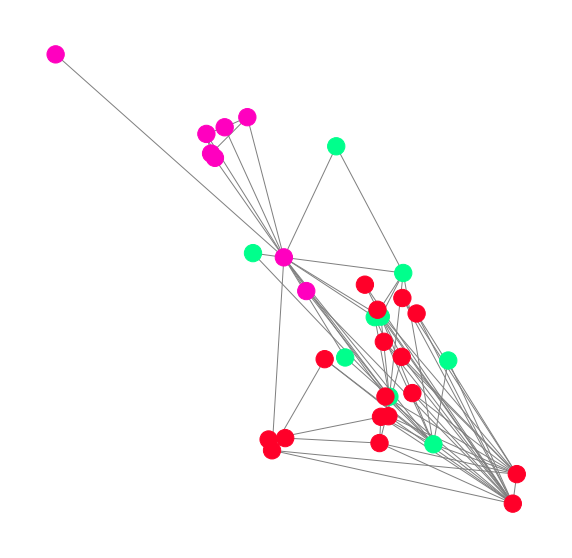

In [78]:
pos = {i: embed[i,:] for i in range(embed.shape[0])}
_ = draw_kkl(g, None, colors, pos=pos, cmap='gist_rainbow', edge_color='gray')

### Training

In [79]:
train_nodes = np.array([0, 1, 8])
test_nodes = np.array([i for i in range(labels.shape[0]) if i not in train_nodes])
opt2 = GradDescentOptim(lr=2e-2, wd=2.5e-2)

In [80]:
print(train_nodes)

[0 1 8]


In [81]:
print(test_nodes)

[ 2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33]


In [87]:
a = 1e6
print(a)

1000000.0


In [82]:
embeds = list()
accs = list()
train_losses = list()
test_losses = list()

loss_min = 1e6
es_iters = 0
es_steps = 50

# lr_rate_ramp = 0 # - 0.05
# lr_ramp_steps = 1000

for epoch in range(15000):
  y_pred = gcn_model.forward(A_hat, X)

  opt2(y_pred, labels, train_nodes)

#     if ((epoch+1) % lr_ramp_steps) == 0:
#         opt2.lr *= 1+lr_rate_ramp
#         print(f"LR set to {opt2.lr:.4f}")

  for layer in reversed(gcn_model.layers):
    layer.backward(opt2, update=True)

  embeds.append(gcn_model.embedding(A_hat, X))

  # Accuracy for non-training nodes
  acc = (np.argmax(y_pred, axis=1) == np.argmax(labels, axis=1))[
      [i for i in range(labels.shape[0]) if i not in train_nodes]
  ]

  accs.append(acc.mean())

  loss = xent(y_pred, labels)
  loss_train = loss[train_nodes].mean()
  loss_test = loss[test_nodes].mean()

  train_losses.append(loss_train)
  test_losses.append(loss_test)

  # loss_min = 1e6
  # loss_min을 따로 정의해서 early stoping을 만듦.
  if loss_test < loss_min:
    loss_min = loss_test
    es_iters = 0
  
  else:
    es_iters += 1

  # es_steps = 50
  # es_iters = 0
  if es_iters > es_steps:
    print('Early stopping!')
    break
  
  if epoch % 100 == 0:
    print(f'Epoch: {epoch+1}, Train Loss: {loss_train:.3f}, Test Loss: {loss_test:.3f}')

Epoch: 1, Train Loss: 1.088, Test Loss: 1.075
Epoch: 101, Train Loss: 1.050, Test Loss: 1.044
Epoch: 201, Train Loss: 1.002, Test Loss: 0.994
Epoch: 301, Train Loss: 0.937, Test Loss: 0.923
Epoch: 401, Train Loss: 0.852, Test Loss: 0.826
Epoch: 501, Train Loss: 0.750, Test Loss: 0.714
Epoch: 601, Train Loss: 0.640, Test Loss: 0.608
Epoch: 701, Train Loss: 0.536, Test Loss: 0.526
Epoch: 801, Train Loss: 0.447, Test Loss: 0.471
Epoch: 901, Train Loss: 0.373, Test Loss: 0.434
Epoch: 1001, Train Loss: 0.312, Test Loss: 0.409
Epoch: 1101, Train Loss: 0.262, Test Loss: 0.392
Epoch: 1201, Train Loss: 0.222, Test Loss: 0.380
Epoch: 1301, Train Loss: 0.191, Test Loss: 0.372
Epoch: 1401, Train Loss: 0.166, Test Loss: 0.366
Epoch: 1501, Train Loss: 0.146, Test Loss: 0.362
Epoch: 1601, Train Loss: 0.131, Test Loss: 0.360
Epoch: 1701, Train Loss: 0.119, Test Loss: 0.358
Epoch: 1801, Train Loss: 0.110, Test Loss: 0.357
Epoch: 1901, Train Loss: 0.102, Test Loss: 0.356
Epoch: 2001, Train Loss: 0.095, 

In [83]:
train_losses = np.array(train_losses)
test_losses = np.array(test_losses)

In [85]:
print(train_losses)
print(len(train_losses))

[1.08828542 1.08787857 1.08747352 ... 0.05293791 0.05293778 0.05293765]
15000


In [86]:
print(test_losses)
print(len(test_losses))

[1.07477118 1.07463274 1.07448894 ... 0.31934778 0.31934587 0.31934396]
15000


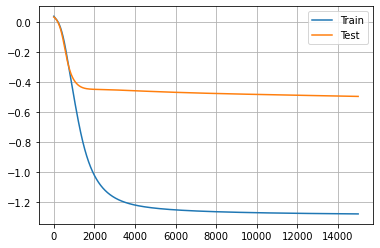

In [88]:
fig, ax = plt.subplots()
ax.plot(np.log10(train_losses), label='Train')
ax.plot(np.log10(test_losses), label='Test')
ax.legend()
ax.grid()

In [89]:
accs[-1]

0.8709677419354839

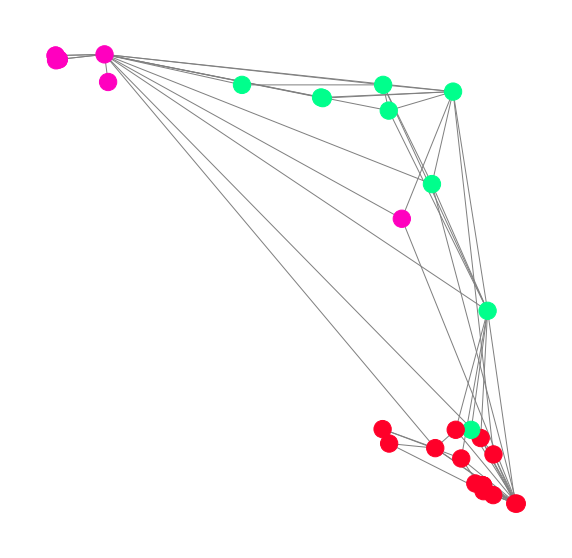

In [90]:
pos = {i: embeds[-1][i,:] for i in range(embeds[-1].shape[0])}
_ = draw_kkl(g, None, colors, pos=pos, cmap='gist_rainbow', edge_color='gray')

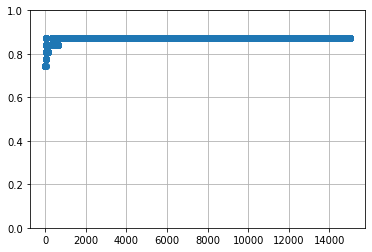

In [91]:
fig, ax = plt.subplots()
_ = ax.plot(accs, marker='o')
ax.grid()
_ = ax.set(ylim=[0,1])

In [92]:
N = 500
snapshots = np.linspace(0, len(embeds) - 1, N).astype(int)
print(snapshots)

[    0    30    60    90   120   150   180   210   240   270   300   330
   360   390   420   450   480   510   541   571   601   631   661   691
   721   751   781   811   841   871   901   931   961   991  1021  1052
  1082  1112  1142  1172  1202  1232  1262  1292  1322  1352  1382  1412
  1442  1472  1502  1532  1563  1593  1623  1653  1683  1713  1743  1773
  1803  1833  1863  1893  1923  1953  1983  2013  2043  2074  2104  2134
  2164  2194  2224  2254  2284  2314  2344  2374  2404  2434  2464  2494
  2524  2554  2584  2615  2645  2675  2705  2735  2765  2795  2825  2855
  2885  2915  2945  2975  3005  3035  3065  3095  3126  3156  3186  3216
  3246  3276  3306  3336  3366  3396  3426  3456  3486  3516  3546  3576
  3606  3637  3667  3697  3727  3757  3787  3817  3847  3877  3907  3937
  3967  3997  4027  4057  4087  4117  4148  4178  4208  4238  4268  4298
  4328  4358  4388  4418  4448  4478  4508  4538  4568  4598  4628  4659
  4689  4719  4749  4779  4809  4839  4869  4899  4

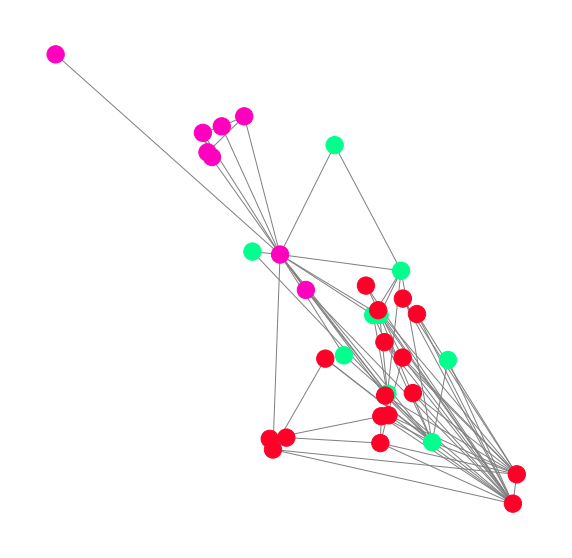

In [94]:
# Build plot
fig, ax = plt.subplots(figsize = (10, 10))
kwargs = {'cmap': 'gist_rainbow',
          'edge_color': 'gray'}
          # node_size 55

def update(idx):
  ax.clear()
  embed = embeds[snapshots[idx]]
  pos = {i: embed[i, :] for i in range(embed.shape[0])}
  nx.draw(g, pos, node_color = colors, ax = ax, **kwargs)

anim = animation.FuncAnimation(fig, update, frames = snapshots.shape[0], interval=10, repeat=False)

In [95]:
HTML(anim.to_html5_video())

In [96]:
%pwd

'/content'

In [97]:
anim.save('embed_anim.mp4', dpi=300)